In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:

# Voltage divider #1

R1 = 100 # ohms unless otherwise stated
R2 = 20E3
C1 = 680E-12 # farads

# Voltage divider #2

R3 = 47E3 # ohms unless otherwise stated
C2 = 0.22E-6 # farads

# Voltage divider #3

R4 = 200 # ohms unless otherwise stated
R5 = 2E3
C3 = 1E-9 # farads

j = 0 + 1j

def gain50(frequency):
    omega = 2 * np.pi * frequency
    amp1 = ((1 / (1 / R2 + (j * omega * C1))) + R1) / R1
    amp2 = ((j * omega * C2) + R3) / R3
    amp3 = ((1 / (1 / R5 + (j * omega * C3))) + R4) / R4
    return ((amp1 * amp3) / amp2)

print(gain50(400))

/home/jupyter/309 workspace/309-Pool/notebooks


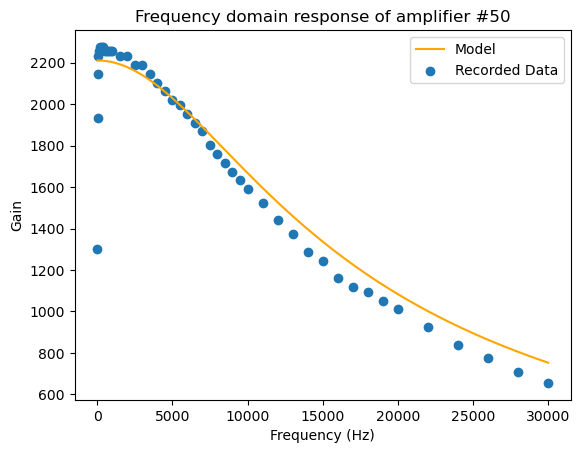

In [5]:
frequency_domain = np.linspace(25, 30000, 300)
fig, ax = plt.subplots()
import os

print(os.getcwd())
# os.chdir("/home/jupyter/309 workspace/309-Pool/scripts/")
data = np.loadtxt("../data_manual/freq_char-amp50.csv", delimiter=",", skiprows=1)
ax.plot(frequency_domain, np.abs(gain50(frequency_domain)), label="Model", c="orange")
ax.scatter(data[:,0], data[:,4], label="Recorded Data")
ax.set_title("Frequency domain response of amplifier #50")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Gain")
ax.legend()

In [ ]:
foo = 2
foo = foo + 3
print(foo)